# Part 1

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "mobiles_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company.Name                 925 non-null    object 
 1   Model.Name                   925 non-null    object 
 2   Mobile.Weight                925 non-null    object 
 3   RAM                          925 non-null    object 
 4   Front.Camera                 925 non-null    object 
 5   Back.Camera                  925 non-null    object 
 6   Processor                    925 non-null    object 
 7   Battery.Capacity.mAh         925 non-null    int64  
 8   Screen.Size.inches           925 non-null    float64
 9   Launched.Price.Pakistan.PKR  925 non-null    int64  
 10  Launched.Price.India.INR     925 non-null    int64  
 11  Launched.Price.China.CNY     925 non-null    int64  
 12  Launched.Price.USA.USD       925 non-null    int64  
 13  Launched.Price.Dubai

Total entries: 925 smartphones.
Columns: 15 features, including brand, model, RAM, camera specs, battery, processor, screen size, prices in different currencies, and launch year.
Data issues: RAM, camera specs, and weight are stored as strings (need conversion).
Prices are stored separately by country, we need to convert them to a single USD column.

In [29]:
#conversion rates
conversion_rates = {
    "PKR": 0.0036,
    "INR": 0.011,
    "CNY": 0.14,
    "AED": 0.27,
    "USD": 1.0, 
}

#prices to USD
df["Average_Launch_Price_USD"] = (
    df["Launched.Price.Pakistan.PKR"] * conversion_rates["PKR"] +
    df["Launched.Price.India.INR"] * conversion_rates["INR"] +
    df["Launched.Price.China.CNY"] * conversion_rates["CNY"] +
    df["Launched.Price.Dubai.AED"] * conversion_rates["AED"] +
    df["Launched.Price.USA.USD"] * conversion_rates["USD"]
) / 5

df[["Company.Name", "Model.Name", "Average_Launch_Price_USD"]].head()


,Company.Name,Model.Name,Average_Launch_Price_USD
0,Apple,iPhone 16 128GB,811.31508
1,Apple,iPhone 16 256GB,858.71508
2,Apple,iPhone 16 512GB,908.91508
3,Apple,iPhone 16 Plus 128GB,904.11508
4,Apple,iPhone 16 Plus 256GB,951.51508


The Average Launch Price in USD is now calculated for each smartphone model. For example, iPhone 16 128GB has an average launch price of 811.31508 dollars.iPhone 16 512GB has an average launch price of 908.91508 dollars.

### Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?

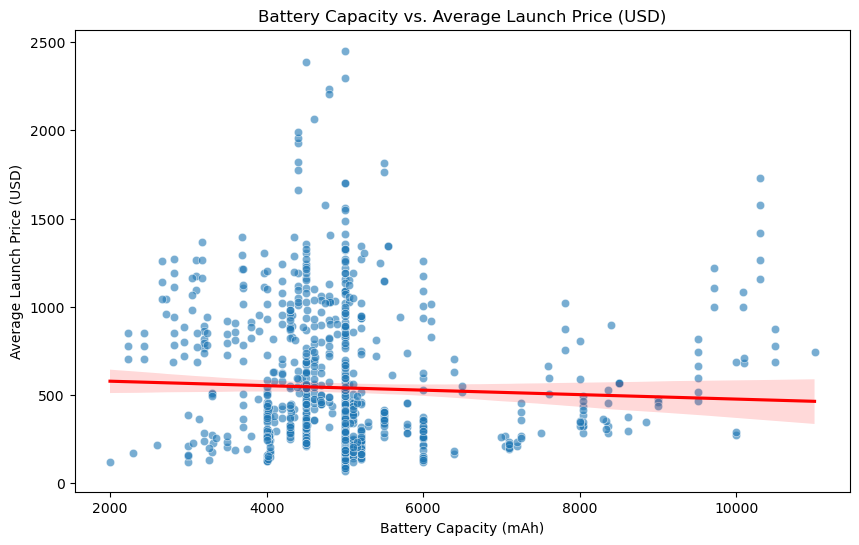

-0.042339477392106493

In [32]:
conversion_rates = {
    "Launched.Price.Pakistan.PKR": 0.0036,
    "Launched.Price.India.INR": 0.011,
    "Launched.Price.China.CNY": 0.14,
    "Launched.Price.Dubai.AED": 0.27,
    "Launched.Price.USA.USD": 1.0, 
}

df["Average_Launch_Price_USD"] = sum(df[col] * rate for col, rate in conversion_rates.items()) / len(conversion_rates)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Average_Launch_Price_USD"], alpha=0.6)

sns.regplot(x=df["Battery.Capacity.mAh"], y=df["Average_Launch_Price_USD"], scatter=False, color="red")

plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Average Launch Price (USD)")
plt.title("Battery Capacity vs. Average Launch Price (USD)")
plt.show()

battery_price_corr = df["Battery.Capacity.mAh"].corr(df["Average_Launch_Price_USD"])
battery_price_corr


The correlation coefficient is -0.042, indicating a very weak negative correlation.
The scatter plot shows no strong relationship between battery capacity and price.
So, Battery size does not significantly influence smartphone pricing.

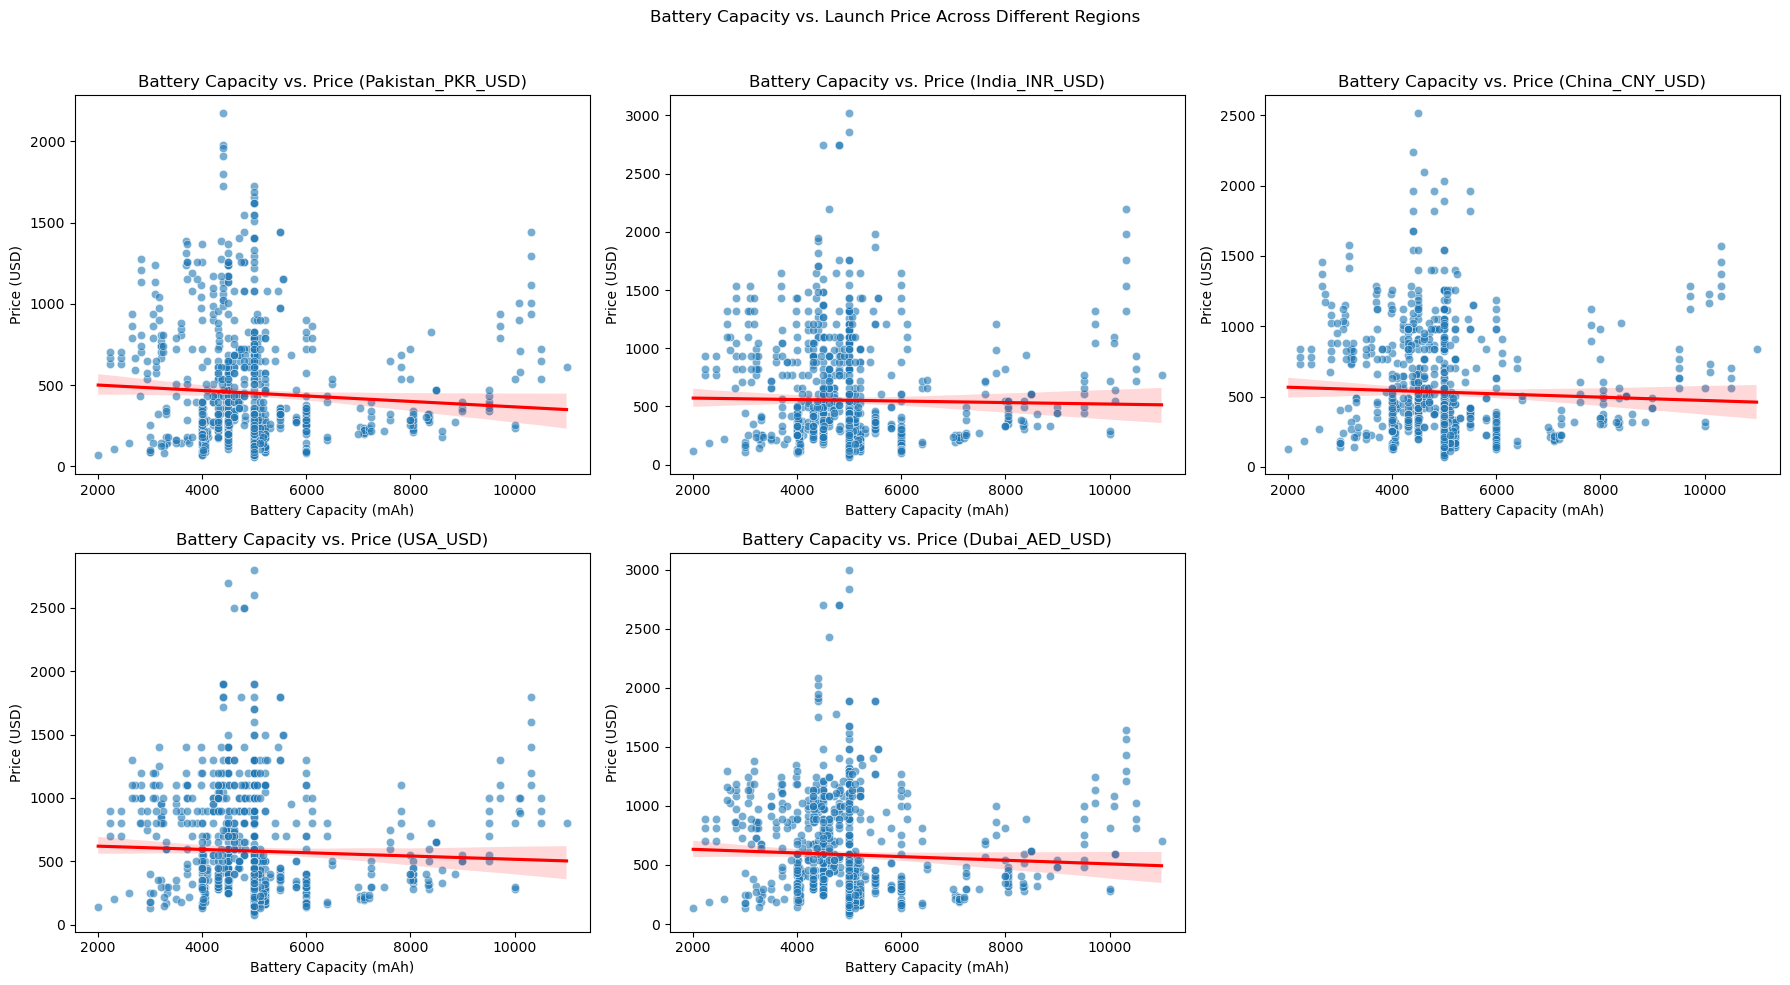

{'Pakistan_PKR_USD': -0.06091272494136717,
 'India_INR_USD': -0.019054291127727517,
 'China_CNY_USD': -0.04104334046511197,
 'USA_USD': -0.04113680436766304,
 'Dubai_AED_USD': -0.04890775514765634}

In [33]:
df["Pakistan_PKR_USD"] = df["Launched.Price.Pakistan.PKR"] * conversion_rates["Launched.Price.Pakistan.PKR"]
df["India_INR_USD"] = df["Launched.Price.India.INR"] * conversion_rates["Launched.Price.India.INR"]
df["China_CNY_USD"] = df["Launched.Price.China.CNY"] * conversion_rates["Launched.Price.China.CNY"]
df["USA_USD"] = df["Launched.Price.USA.USD"] * conversion_rates["Launched.Price.USA.USD"]
df["Dubai_AED_USD"] = df["Launched.Price.Dubai.AED"] * conversion_rates["Launched.Price.Dubai.AED"]

battery_price_corr_by_region = {
    "Pakistan_PKR_USD": df["Battery.Capacity.mAh"].corr(df["Pakistan_PKR_USD"]),
    "India_INR_USD": df["Battery.Capacity.mAh"].corr(df["India_INR_USD"]),
    "China_CNY_USD": df["Battery.Capacity.mAh"].corr(df["China_CNY_USD"]),
    "USA_USD": df["Battery.Capacity.mAh"].corr(df["USA_USD"]),
    "Dubai_AED_USD": df["Battery.Capacity.mAh"].corr(df["Dubai_AED_USD"]),
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Battery Capacity vs. Launch Price Across Different Regions")

regions = ["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]
for i, region in enumerate(regions):
    row, col = divmod(i, 3)
    sns.scatterplot(ax=axes[row, col], x=df["Battery.Capacity.mAh"], y=df[region], alpha=0.6)
    sns.regplot(ax=axes[row, col], x=df["Battery.Capacity.mAh"], y=df[region], scatter=False, color="red")
    axes[row, col].set_title(f"Battery Capacity vs. Price ({region})")
    axes[row, col].set_xlabel("Battery Capacity (mAh)")
    axes[row, col].set_ylabel("Price (USD)")

axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

battery_price_corr_by_region


Across all regions, battery capacity shows very weak negative correlations with price, meaning that battery size does not significantly affect smartphone prices.
India shows the weakest correlation -0.019, indicating that battery capacity plays almost no role in smartphone pricing there.
Pakistan has the strongest negative correlation -0.061, suggesting a slightly stronger trend of lower-priced phones having larger batteries, but the effect is still minimal.
The USA, China, and Dubai show very similar behaviors -0.041 to -0.049, confirming that battery size is not a major pricing factor globally.

#### Conclusion
Battery capacity does not significantly impact smartphone prices in any region.
The pricing of smartphones is likely influenced more by brand reputation, processor, display quality, camera specs, and additional features.
No major difference in behavior across regions—all show very weak correlation.

### 2. Does RAM size impact the price of smartphones? Check this variability across all currencies. Is there any type of difference between behaviors?

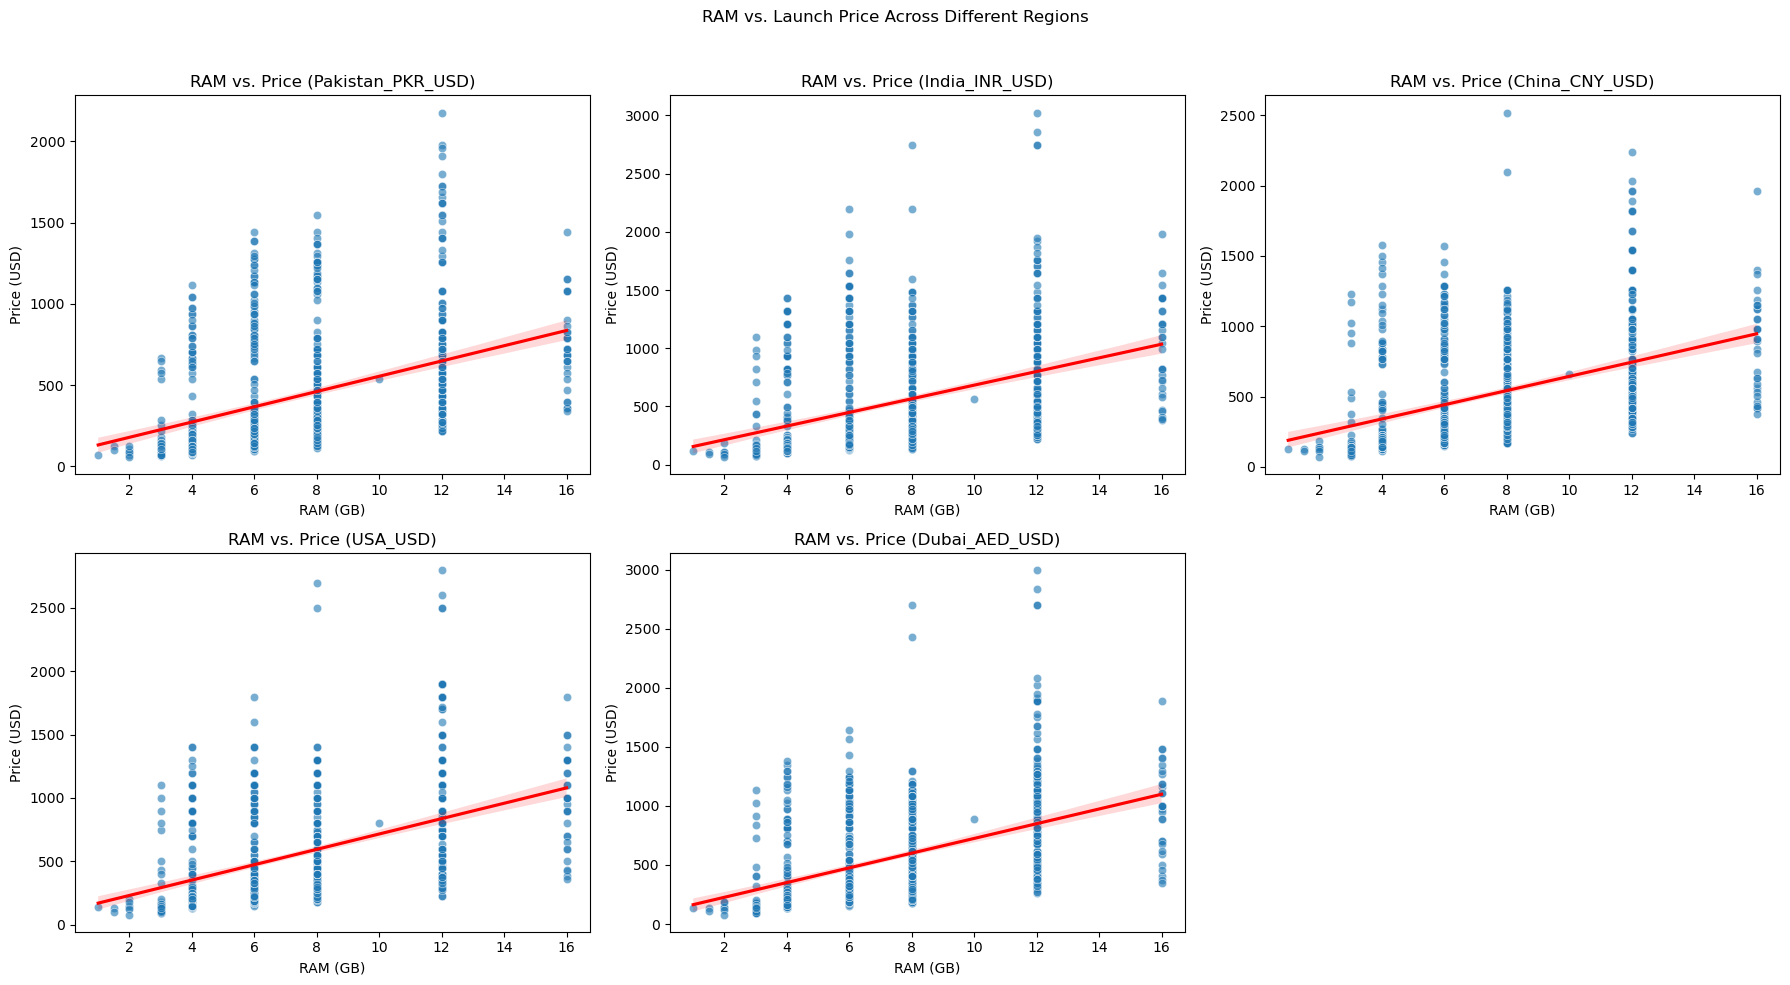

{'Pakistan_PKR_USD': 0.4089497152667738,
 'India_INR_USD': 0.4161399355538155,
 'China_CNY_USD': 0.4216108822193185,
 'USA_USD': 0.4618929074031945,
 'Dubai_AED_USD': 0.47295935137622347}

In [34]:
df["RAM_GB"] = df["RAM"].str.extract(r'(\d+\.?\d*)').astype(float)

ram_price_corr_by_region = {
    "Pakistan_PKR_USD": df["RAM_GB"].corr(df["Pakistan_PKR_USD"]),
    "India_INR_USD": df["RAM_GB"].corr(df["India_INR_USD"]),
    "China_CNY_USD": df["RAM_GB"].corr(df["China_CNY_USD"]),
    "USA_USD": df["RAM_GB"].corr(df["USA_USD"]),
    "Dubai_AED_USD": df["RAM_GB"].corr(df["Dubai_AED_USD"]),
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("RAM vs. Launch Price Across Different Regions")

regions = ["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]
for i, region in enumerate(regions):
    row, col = divmod(i, 3)
    sns.scatterplot(ax=axes[row, col], x=df["RAM_GB"], y=df[region], alpha=0.6)
    sns.regplot(ax=axes[row, col], x=df["RAM_GB"], y=df[region], scatter=False, color="red")
    axes[row, col].set_title(f"RAM vs. Price ({region})")
    axes[row, col].set_xlabel("RAM (GB)")
    axes[row, col].set_ylabel("Price (USD)")

axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

ram_price_corr_by_region


All regions show a moderate positive correlation between RAM and smartphone prices.
Dubai and the USA show the highest correlation 0.47 and 0.46, respectively, indicating that RAM plays a stronger role in pricing in these regions.
Pakistan has the lowest correlation 0.409, suggesting that while RAM affects pricing, other factors play a bigger role in this market.
China, India, and Pakistan show similar trends, meaning RAM influences price but not as significantly as in the premium-focused USA/Dubai markets.

#### Conclusion
RAM size does impact smartphone pricing, but its effect varies across regions.
The USA and Dubai emphasize RAM more in pricing, likely due to premium and flagship models dominating those markets.
In price-sensitive regions like Pakistan, RAM has less influence, possibly due to more budget-friendly smartphones where battery and display might play a bigger role.
Overall, RAM has a stronger influence on price compared to battery capacity, but it is not the only deciding factor.

### 3.Do Apple devices have a higher price variation across different regions compared to otherbrands? In which country do Apple devices have the highest markup? Are there brands with more stable pricing across regions?

In [35]:
apple_df = df[df["Company.Name"].str.lower() == "apple"]

apple_df["Price_Variation"] = apple_df[["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]].std(axis=1)
apple_avg_variation = apple_df["Price_Variation"].mean()
apple_avg_prices = apple_df[["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]].mean()
highest_markup_country = apple_avg_prices.idxmax()
highest_markup_price = apple_avg_prices.max()
brand_variation = df.groupby("Company.Name")[["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]].std().mean(axis=1)

most_stable_brands = brand_variation.nsmallest(5)
most_variable_brands = brand_variation.nlargest(5)

apple_price_variation_summary = {
    "Apple Avg Price Variation (USD)": apple_avg_variation,
    "Highest Apple Markup Country": highest_markup_country,
    "Highest Apple Markup Price (USD)": highest_markup_price,
    "Most Stable Brands": most_stable_brands,
    "Most Variable Brands": most_variable_brands,
}

apple_price_variation_summary


/var/folders/nb/cxq9gqp17250_y74yk550ppw0000gq/T/ipykernel_83168/2271982607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df["Price_Variation"] = apple_df[["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]].std(axis=1)


{'Apple Avg Price Variation (USD)': 115.2932297893987,
 'Highest Apple Markup Country': 'India_INR_USD',
 'Highest Apple Markup Price (USD)': 1132.9845773195873,
 'Most Stable Brands': Company.Name
 Poco       15.117943
 Nokia      45.206178
 iQOO       58.308283
 Infinix    94.766459
 Realme     98.848657
 dtype: float64,
 'Most Variable Brands': Company.Name
 Huawei     595.297700
 Samsung    515.395324
 Sony       391.875802
 Honor      388.825352
 Tecno      363.982628
 dtype: float64}

Apple's average price variation is 115.29 USD.
Compared to other brands, Apple has moderate price variability—not the highest but still noticeable.
Huawei 595.30 USD and Samsung 515.40 USD have much higher price fluctuations than Apple.
Brands like Poco and Nokia show much more stable pricing with minimal variation.
So, Apple does have price variation across regions, but it's not the most unstable brand.

The highest Apple markup is in India, where the average launch price is 1132.98 USD.
This means Apple devices cost significantly more in India compared to other markets.
Factors contributing to this could be import duties, local taxes, and market demand.

The most stable brands (lowest price variation across regions) are:

Poco (15.12 USD variation, most consistent pricing across regions),
Nokia (45.21 USD variation),
iQOO (58.31 USD variation),
Infinix (94.77 USD variation),
Realme (98.85 USD variation).
These brands keep their pricing stable in different regions, likely due to direct-to-market pricing strategies or lower dependency on import taxes.
So, Poco, Nokia, and iQOO are the most stable brands across regions.

#### Conclusion
Apple’s pricing varies but is more stable than Huawei and Samsung.
India has the highest Apple markup.
Brands like Poco, Nokia, and iQOO have stable global pricing.

### 4. Do all smartphone brands have flagship and budget-friendly models, or do some brands only focus on premium devices?

In [36]:
def categorize_price(price):
    if price < 300:
        return "Budget"
    elif 300 <= price <= 700:
        return "Mid-range"
    else:
        return "Premium"

df["Price_Category"] = df["Average_Launch_Price_USD"].apply(categorize_price)

brand_segments = df.groupby(["Company.Name", "Price_Category"])["Model.Name"].count().unstack(fill_value=0)
brand_segments["Covers_All_Segments"] = (brand_segments["Budget"] > 0) & (brand_segments["Mid-range"] > 0) & (brand_segments["Premium"] > 0)
brand_segments


Price_Category,Budget,Mid-range,Premium,Covers_All_Segments
Company.Name,,,,
Apple,1,6,90,True
Google,0,11,10,False
Honor,33,35,23,True
Huawei,0,17,25,False
Infinix,43,13,0,False
Lenovo,10,5,0,False
Motorola,27,29,6,True
Nokia,10,0,0,False
OnePlus,9,29,15,True


Brands Covering All Three Segments.
These brands offer models in all 3 categories, meaning they serve a diverse audience.

Apple (1 Budget, 6 Mid-range, 90 Premium),
Honor (33 Budget, 35 Mid-range, 23 Premium)

Brands Focusing on Mid-range and Premium.
These brands do not offer budget-friendly models and focus only on higher-end devices.

Google (0 Budget, 11 Mid-range, 10 Premium),
Huawei (0 Budget, 17 Mid-range, 25 Premium)

Brands Focusing Only on Budget and Mid-range.
These brands do not have premium models, meaning they target affordable and mid-range markets.

Infinix (43 Budget, 13 Mid-range, 0 Premium)


#### Conclusion
Apple and Honor are the only brands covering all three segments.
Google and Huawei focus on premium and mid-range markets, skipping budget models.
Infinix is strictly a budget/mid-range brand with no premium models.
Apple's premium dominance is unmatched.

### 5. Which region offers the most affordable smartphone prices on average? Are there any brands that price their phones significantly lower in one region compared to others?

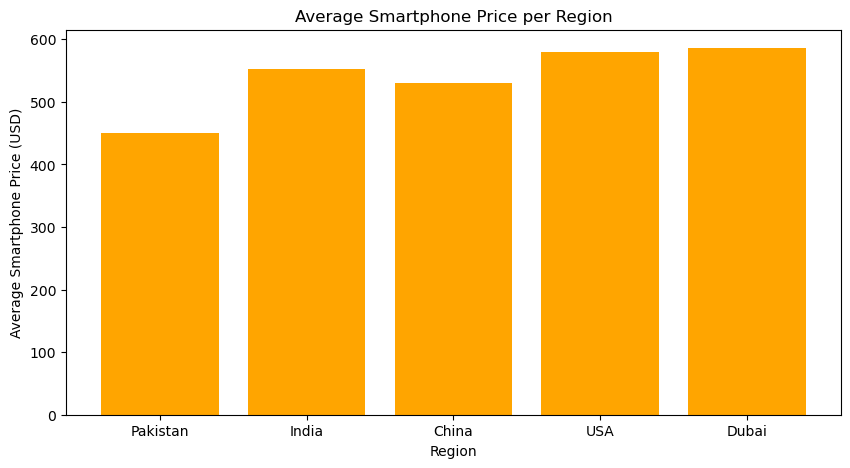

({'Pakistan': 449.93423870270266,
  'India': 552.823682162162,
  'China': 530.7413621621622,
  'USA': 579.6237837837838,
  'Dubai': 586.0290162162161},
 'Most Affordable Region: Pakistan',
               Pakistan_PKR_USD  India_INR_USD  China_CNY_USD      USA_USD  \
 Company.Name                                                                
 Google              620.567829     773.655667     848.526667   755.190476   
 Honor               432.629367     537.357132     471.706154   607.571429   
 Huawei              660.725143    1130.784286     960.790000  1116.571429   
 Infinix             158.074971     190.524714     218.610000   245.071429   
 Lenovo              226.796400     279.316400     294.784000   311.666667   
 Motorola            329.686723     370.618032     378.311613   433.258065   
 OnePlus             485.317291     503.083340     552.992075   608.622642   
 Oppo                341.521981     481.342946     477.487907   505.279070   
 POCO                209.996400

In [37]:
average_prices_per_region = {
    "Pakistan": df["Pakistan_PKR_USD"].mean(),
    "India": df["India_INR_USD"].mean(),
    "China": df["China_CNY_USD"].mean(),
    "USA": df["USA_USD"].mean(),
    "Dubai": df["Dubai_AED_USD"].mean(),
}

most_affordable_region = min(average_prices_per_region, key=average_prices_per_region.get)

plt.figure(figsize=(10, 5))
plt.bar(average_prices_per_region.keys(), average_prices_per_region.values(), color="orange")
plt.xlabel("Region")
plt.ylabel("Average Smartphone Price (USD)")
plt.title("Average Smartphone Price per Region")
plt.show()

brand_price_diff = df.groupby("Company.Name")[["Pakistan_PKR_USD", "India_INR_USD", "China_CNY_USD", "USA_USD", "Dubai_AED_USD"]].mean()
brand_price_diff["Max_Min_Diff_Percentage"] = ((brand_price_diff.max(axis=1) - brand_price_diff.min(axis=1)) / brand_price_diff.min(axis=1)) * 100
brands_with_large_variation = brand_price_diff[brand_price_diff["Max_Min_Diff_Percentage"] > 30]
average_prices_per_region, f"Most Affordable Region: {most_affordable_region}", brands_with_large_variation


The cheapest region for smartphones is Pakistan, where the average price is 449.93 USD.
Dubai and the USA are the most expensive regions, both averaging around 580+ USD.
India and China fall in between, but India has slightly higher average prices.

Huawei has the highest markup variation 71.14%, with Pakistan offering the lowest prices and India having the most expensive Huawei devices.
Vivo has the highest variation overall 80.10%, with a large price difference between Pakistan and Dubai.
Budget brands like Infinix, Oppo, and Tecno show significant price reductions in Pakistan.

#### Conclusion
Pakistan is the most affordable region for smartphones.
Huawei, Vivo, and Tecno have massive price variations across regions.
Budget-friendly brands (Infinix, POCO, Oppo) are much cheaper in Pakistan than in Dubai/India.
Dubai tends to have the highest pricing for many brands.

# Part 2

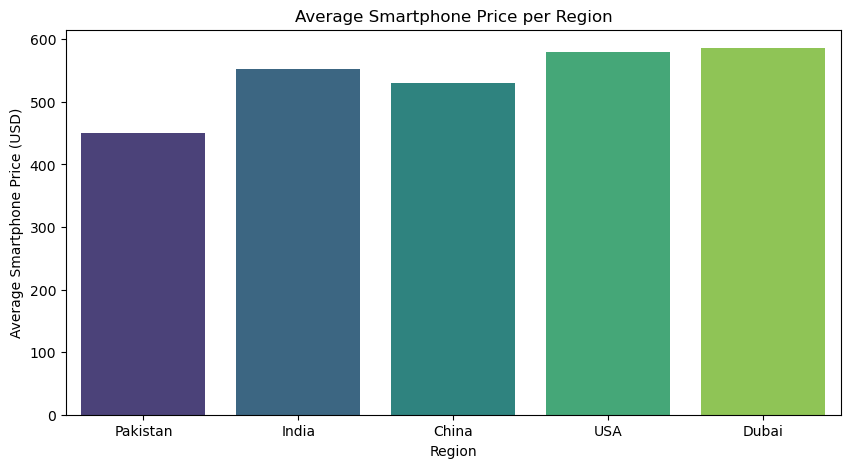

In [38]:
avg_prices = {
    "Pakistan": df["Pakistan_PKR_USD"].mean(),
    "India": df["India_INR_USD"].mean(),
    "China": df["China_CNY_USD"].mean(),
    "USA": df["USA_USD"].mean(),
    "Dubai": df["Dubai_AED_USD"].mean()
}

plt.figure(figsize=(10, 5))
import seaborn as sns
sns.barplot(x=list(avg_prices.keys()), y=list(avg_prices.values()), palette='viridis')
plt.xlabel("Region")
plt.ylabel("Average Smartphone Price (USD)")
plt.title("Average Smartphone Price per Region")
plt.show()

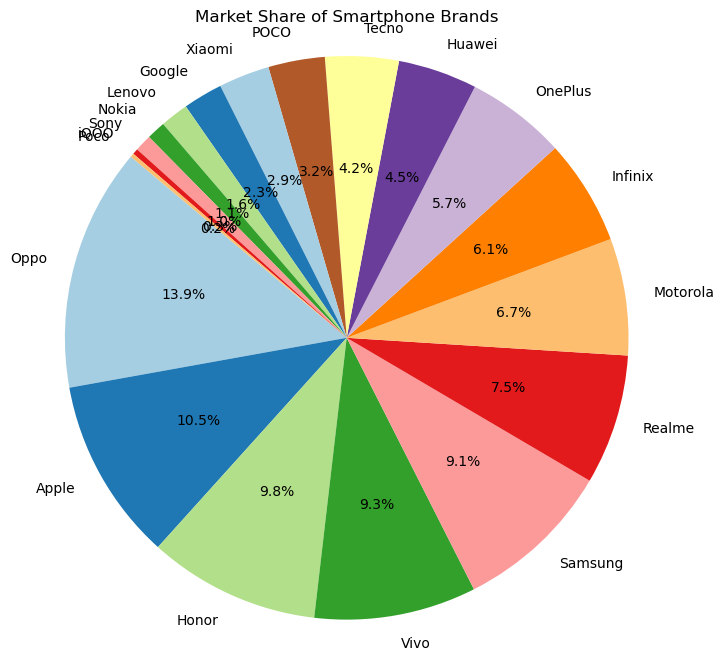

In [39]:
brand_counts = df["Company.Name"].value_counts()
brand_market_share = brand_counts / brand_counts.sum() * 100
plt.figure(figsize=(8, 8))
plt.pie(brand_market_share, labels=brand_market_share.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Market Share of Smartphone Brands")
plt.axis("equal")   
plt.show()

# Part 4: Personal findings

- Storage and RAM – The most significant factors influencing price. Higher RAM and larger storage capacity lead to higher costs.
- Processor Type – Higher-end processors contribute significantly to premium pricing.
- Battery Capacity – Although important, it has a smaller impact compared to storage and processing power.
- Screen Size & Quality – Larger screens and high-refresh-rate displays increase the cost.
- Camera Specifications – The number of cameras, megapixels, and sensor quality influence pricing but are secondary to storage and processor.
- Brand Reputation – Premium brands such as Apple, Samsung price their devices higher due to perceived quality, ecosystem, and customer loyalty.
- Build Quality & Materials – Devices made with premium materials like glass, metal, or foldable displays tend to be more expensive.
- 5G Connectivity – Phones supporting 5G are generally priced higher than their 4G counterparts.
- Operating System – iOS devices are usually priced higher than Android due to ecosystem exclusivity and software optimization.

